<h3>Testing Notebook</h3>

In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [2]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288 # replicated

In [3]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [4]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [5]:
data = Dataset(ligands, polarization, replicas, size)

In [6]:
%%time
for _ in data:
    pass

Wall time: 36 ms


In [7]:
data.data.shape

(69552, 98, 1)

In [8]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [10]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
X_len, test_len = int(len(data.data) * 0.9), int(len(data.data) * 0.1)
train_len, val_len = int(X_len * 0.9), int(X_len * 0.1)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

62596 6955 56336 6259
69551 69552


In [12]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [13]:
data.data[1000].shape
len(data)

69552

In [14]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len+1]) # need separate data and labels for LSTM?

In [15]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [16]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

979 109 1088


<h3>Model Training</h3>

In [17]:
from core.network import *
from core.trainer import *

In [18]:
torch.cuda.is_available()

True

In [19]:
#model parameters
input_size = 1
hidden_sizes = 98
output_size = 9

#training parameters
n_epochs = 75
batch_size = 64
learning_rate = 1e-3

In [20]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=3, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 98, num_layers=3, batch_first=True)
  (fc1): Linear(in_features=98, out_features=9, bias=True)
)

In [21]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [22]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  1%|█                                                                                  | 1/75 [00:12<15:54, 12.90s/it]

Epoch 001: | Training Loss: 2.1073085136627885 | Validation Loss: 2.0921724094163388


  3%|██▏                                                                                | 2/75 [00:24<14:34, 11.98s/it]

Epoch 002: | Training Loss: 2.1572103924113226 | Validation Loss: 2.167040363364263


  4%|███▎                                                                               | 3/75 [00:34<13:37, 11.36s/it]

Epoch 003: | Training Loss: 2.19645857713561 | Validation Loss: 2.1974700000307976


  5%|████▍                                                                              | 4/75 [00:45<13:10, 11.14s/it]

Epoch 004: | Training Loss: 2.1974148723516573 | Validation Loss: 2.197320914049761


  7%|█████▌                                                                             | 5/75 [00:56<12:45, 10.93s/it]

Epoch 005: | Training Loss: 2.1853541127264315 | Validation Loss: 2.131868008079879


  8%|██████▋                                                                            | 6/75 [01:07<12:33, 10.92s/it]

Epoch 006: | Training Loss: 2.018567969777124 | Validation Loss: 1.8928396340903886


  9%|███████▋                                                                           | 7/75 [01:18<12:25, 10.97s/it]

Epoch 007: | Training Loss: 1.80772178677178 | Validation Loss: 1.6985478991762213


 11%|████████▊                                                                          | 8/75 [01:28<12:10, 10.91s/it]

Epoch 008: | Training Loss: 1.657181080563928 | Validation Loss: 1.6020175929463238


 12%|█████████▉                                                                         | 9/75 [01:39<11:57, 10.87s/it]

Epoch 009: | Training Loss: 1.593684435956203 | Validation Loss: 1.5511404035288259


 13%|██████████▉                                                                       | 10/75 [01:50<11:43, 10.82s/it]

Epoch 010: | Training Loss: 1.5428054598183871 | Validation Loss: 1.5041943974451188


 15%|████████████                                                                      | 11/75 [02:01<11:28, 10.76s/it]

Epoch 011: | Training Loss: 1.491254913916505 | Validation Loss: 1.4492976523320609


 16%|█████████████                                                                     | 12/75 [02:11<11:14, 10.70s/it]

Epoch 012: | Training Loss: 1.4410137199892818 | Validation Loss: 1.4207600781676966


 17%|██████████████▏                                                                   | 13/75 [02:22<11:02, 10.69s/it]

Epoch 013: | Training Loss: 1.3959539069340348 | Validation Loss: 1.384823889907347


 19%|███████████████▎                                                                  | 14/75 [02:32<10:50, 10.66s/it]

Epoch 014: | Training Loss: 1.3526949312031817 | Validation Loss: 1.3260773759369457


 20%|████████████████▍                                                                 | 15/75 [02:43<10:39, 10.65s/it]

Epoch 015: | Training Loss: 1.31413815256524 | Validation Loss: 1.298518671901948


 21%|█████████████████▍                                                                | 16/75 [02:54<10:30, 10.68s/it]

Epoch 016: | Training Loss: 1.2878494407292893 | Validation Loss: 1.2811780664898933


 23%|██████████████████▌                                                               | 17/75 [03:05<10:22, 10.74s/it]

Epoch 017: | Training Loss: 1.2562288503115948 | Validation Loss: 1.3046695316603425


 24%|███████████████████▋                                                              | 18/75 [03:15<10:09, 10.69s/it]

Epoch 018: | Training Loss: 1.2356044917963864 | Validation Loss: 1.238987484109511


 25%|████████████████████▊                                                             | 19/75 [03:26<09:57, 10.66s/it]

Epoch 019: | Training Loss: 1.2280332953864148 | Validation Loss: 1.2596038798673437


 27%|█████████████████████▊                                                            | 20/75 [03:37<09:48, 10.70s/it]

Epoch 020: | Training Loss: 1.190378197671444 | Validation Loss: 1.2100714357621078


 28%|██████████████████████▉                                                           | 21/75 [03:47<09:39, 10.74s/it]

Epoch 021: | Training Loss: 1.1574063540966202 | Validation Loss: 1.209443975479231


 29%|████████████████████████                                                          | 22/75 [03:58<09:28, 10.72s/it]

Epoch 022: | Training Loss: 1.1347112648333666 | Validation Loss: 1.170620049358508


 31%|█████████████████████████▏                                                        | 23/75 [04:09<09:15, 10.68s/it]

Epoch 023: | Training Loss: 1.114013787735714 | Validation Loss: 1.1631350883650124


 32%|██████████████████████████▏                                                       | 24/75 [04:20<09:07, 10.73s/it]

Epoch 024: | Training Loss: 1.0995662217851314 | Validation Loss: 1.1360964764148818


 33%|███████████████████████████▎                                                      | 25/75 [04:30<08:52, 10.66s/it]

Epoch 025: | Training Loss: 1.052979431673504 | Validation Loss: 1.1327342095725033


 35%|████████████████████████████▍                                                     | 26/75 [04:41<08:39, 10.61s/it]

Epoch 026: | Training Loss: 1.0268345060582302 | Validation Loss: 1.0999037760113357


 36%|█████████████████████████████▌                                                    | 27/75 [04:51<08:29, 10.61s/it]

Epoch 027: | Training Loss: 0.9927757808575226 | Validation Loss: 1.0893526449115998


 37%|██████████████████████████████▌                                                   | 28/75 [05:02<08:22, 10.69s/it]

Epoch 028: | Training Loss: 0.9661086564531609 | Validation Loss: 1.0884013553278162


 39%|███████████████████████████████▋                                                  | 29/75 [05:13<08:11, 10.69s/it]

Epoch 029: | Training Loss: 0.9365505175522326 | Validation Loss: 1.0498498032946106


 40%|████████████████████████████████▊                                                 | 30/75 [05:23<07:58, 10.64s/it]

Epoch 030: | Training Loss: 0.9015642480051432 | Validation Loss: 1.0277477486417927


 41%|█████████████████████████████████▉                                                | 31/75 [05:34<07:50, 10.68s/it]

Epoch 031: | Training Loss: 0.8767181129268046 | Validation Loss: 1.01938369405379


 43%|██████████████████████████████████▉                                               | 32/75 [05:45<07:39, 10.70s/it]

Epoch 032: | Training Loss: 0.8424002934281503 | Validation Loss: 0.9887199090161455


 44%|████████████████████████████████████                                              | 33/75 [05:55<07:28, 10.69s/it]

Epoch 033: | Training Loss: 0.8170237509235054 | Validation Loss: 0.9956846849634013


 45%|█████████████████████████████████████▏                                            | 34/75 [06:06<07:20, 10.75s/it]

Epoch 034: | Training Loss: 0.8136907896907872 | Validation Loss: 0.9591359911708657


 47%|██████████████████████████████████████▎                                           | 35/75 [06:17<07:09, 10.74s/it]

Epoch 035: | Training Loss: 0.7666855647140187 | Validation Loss: 0.9672770593144479


 48%|███████████████████████████████████████▎                                          | 36/75 [06:28<06:57, 10.69s/it]

Epoch 036: | Training Loss: 0.7347417807128505 | Validation Loss: 0.924893576070803


 49%|████████████████████████████████████████▍                                         | 37/75 [06:39<06:51, 10.84s/it]

Epoch 037: | Training Loss: 0.7237868574471712 | Validation Loss: 0.912968373626744


 51%|█████████████████████████████████████████▌                                        | 38/75 [06:50<06:45, 10.97s/it]

Epoch 038: | Training Loss: 0.6874076045813673 | Validation Loss: 0.8908079326699633


 52%|██████████████████████████████████████████▋                                       | 39/75 [07:01<06:38, 11.08s/it]

Epoch 039: | Training Loss: 0.6715957209757083 | Validation Loss: 1.012961195149553


 53%|███████████████████████████████████████████▋                                      | 40/75 [07:13<06:35, 11.29s/it]

Epoch 040: | Training Loss: 0.6679218446453453 | Validation Loss: 0.8966064187911672


 55%|████████████████████████████████████████████▊                                     | 41/75 [07:25<06:27, 11.39s/it]

Epoch 041: | Training Loss: 0.6162261263647167 | Validation Loss: 0.8621327138822014


 56%|█████████████████████████████████████████████▉                                    | 42/75 [07:36<06:13, 11.30s/it]

Epoch 042: | Training Loss: 0.5975322467983682 | Validation Loss: 0.8562696994444646


 57%|███████████████████████████████████████████████                                   | 43/75 [07:47<05:57, 11.19s/it]

Epoch 043: | Training Loss: 0.5763933383712243 | Validation Loss: 0.8687524781861437


 59%|████████████████████████████████████████████████                                  | 44/75 [07:58<05:42, 11.05s/it]

Epoch 044: | Training Loss: 0.5749113712539712 | Validation Loss: 0.8726115866538582


 60%|█████████████████████████████████████████████████▏                                | 45/75 [08:08<05:30, 11.01s/it]

Epoch 045: | Training Loss: 0.5510494290956651 | Validation Loss: 0.8471322666614427


 61%|██████████████████████████████████████████████████▎                               | 46/75 [08:19<05:19, 11.00s/it]

Epoch 046: | Training Loss: 0.5321747714214111 | Validation Loss: 0.8606790192083481


 63%|███████████████████████████████████████████████████▍                              | 47/75 [08:30<05:07, 10.97s/it]

Epoch 047: | Training Loss: 0.5191677280295491 | Validation Loss: 0.8367805702423831


 64%|████████████████████████████████████████████████████▍                             | 48/75 [08:41<04:53, 10.89s/it]

Epoch 048: | Training Loss: 0.4920874456128256 | Validation Loss: 0.8430035037731906


 65%|█████████████████████████████████████████████████████▌                            | 49/75 [08:52<04:40, 10.79s/it]

Epoch 049: | Training Loss: 0.4722797695444602 | Validation Loss: 0.8821491451438414


 67%|██████████████████████████████████████████████████████▋                           | 50/75 [09:02<04:29, 10.76s/it]

Epoch 050: | Training Loss: 0.46898640727241875 | Validation Loss: 0.8322192594545696


 68%|███████████████████████████████████████████████████████▊                          | 51/75 [09:13<04:18, 10.78s/it]

Epoch 051: | Training Loss: 0.45098800773031256 | Validation Loss: 0.8184125024244326


 69%|████████████████████████████████████████████████████████▊                         | 52/75 [09:24<04:06, 10.73s/it]

Epoch 052: | Training Loss: 0.4285470902067405 | Validation Loss: 0.7697195979433322


 71%|█████████████████████████████████████████████████████████▉                        | 53/75 [09:34<03:55, 10.69s/it]

Epoch 053: | Training Loss: 0.42467294283310164 | Validation Loss: 0.8023517536460807


 72%|███████████████████████████████████████████████████████████                       | 54/75 [09:45<03:44, 10.68s/it]

Epoch 054: | Training Loss: 0.44926875968205915 | Validation Loss: 0.8998975428419376


 73%|████████████████████████████████████████████████████████████▏                     | 55/75 [09:56<03:33, 10.66s/it]

Epoch 055: | Training Loss: 0.41331107095568853 | Validation Loss: 0.7802399284795883


 75%|█████████████████████████████████████████████████████████████▏                    | 56/75 [10:06<03:22, 10.63s/it]

Epoch 056: | Training Loss: 0.35780677372880804 | Validation Loss: 0.7499578627971334


 76%|██████████████████████████████████████████████████████████████▎                   | 57/75 [10:17<03:11, 10.61s/it]

Epoch 057: | Training Loss: 0.3825156008929349 | Validation Loss: 0.7504695533612452


 77%|███████████████████████████████████████████████████████████████▍                  | 58/75 [10:27<03:00, 10.65s/it]

Epoch 058: | Training Loss: 0.36130482293246835 | Validation Loss: 0.7704681316646961


 79%|████████████████████████████████████████████████████████████████▌                 | 59/75 [10:38<02:50, 10.64s/it]

Epoch 059: | Training Loss: 0.35491437968499273 | Validation Loss: 0.7452728578803736


 80%|█████████████████████████████████████████████████████████████████▌                | 60/75 [10:49<02:41, 10.79s/it]

Epoch 060: | Training Loss: 0.3359469593606273 | Validation Loss: 0.7591807047981735


 81%|██████████████████████████████████████████████████████████████████▋               | 61/75 [11:00<02:30, 10.77s/it]

Epoch 061: | Training Loss: 0.332748146371895 | Validation Loss: 0.8710503903550839


 83%|███████████████████████████████████████████████████████████████████▊              | 62/75 [11:10<02:19, 10.70s/it]

Epoch 062: | Training Loss: 0.33809596953097354 | Validation Loss: 0.7958376894303418


 84%|████████████████████████████████████████████████████████████████████▉             | 63/75 [11:21<02:09, 10.78s/it]

Epoch 063: | Training Loss: 0.305254988775677 | Validation Loss: 0.7290824211518699


 85%|█████████████████████████████████████████████████████████████████████▉            | 64/75 [11:32<01:58, 10.77s/it]

Epoch 064: | Training Loss: 0.3271021456348275 | Validation Loss: 0.7971456816437048


 87%|███████████████████████████████████████████████████████████████████████           | 65/75 [11:43<01:47, 10.72s/it]

Epoch 065: | Training Loss: 0.3184118795915449 | Validation Loss: 0.7334135404420555


 88%|████████████████████████████████████████████████████████████████████████▏         | 66/75 [11:54<01:36, 10.75s/it]

Epoch 066: | Training Loss: 0.2904076724559586 | Validation Loss: 0.7905543769171478


 89%|█████████████████████████████████████████████████████████████████████████▎        | 67/75 [12:05<01:26, 10.83s/it]

Epoch 067: | Training Loss: 0.295590577485369 | Validation Loss: 0.7326841239535481


 91%|██████████████████████████████████████████████████████████████████████████▎       | 68/75 [12:16<01:16, 10.96s/it]

Epoch 068: | Training Loss: 0.27282013238785335 | Validation Loss: 0.7967301142325095


 92%|███████████████████████████████████████████████████████████████████████████▍      | 69/75 [12:27<01:05, 10.91s/it]

Epoch 069: | Training Loss: 0.2775502521011967 | Validation Loss: 0.7657428449447002


 93%|████████████████████████████████████████████████████████████████████████████▌     | 70/75 [12:37<00:54, 10.85s/it]

Epoch 070: | Training Loss: 0.2648745632565849 | Validation Loss: 0.7211886327201074


 95%|█████████████████████████████████████████████████████████████████████████████▋    | 71/75 [12:48<00:43, 10.83s/it]

Epoch 071: | Training Loss: 0.266767019757942 | Validation Loss: 0.7930451885822716


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 72/75 [12:59<00:32, 10.84s/it]

Epoch 072: | Training Loss: 0.2802311821219505 | Validation Loss: 0.7988112883283458


 97%|███████████████████████████████████████████████████████████████████████████████▊  | 73/75 [13:10<00:21, 10.79s/it]

Epoch 073: | Training Loss: 0.2478033217360799 | Validation Loss: 0.7142717026242422


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 74/75 [13:20<00:10, 10.73s/it]

Epoch 074: | Training Loss: 0.23316829779829384 | Validation Loss: 0.7805290328800132


100%|██████████████████████████████████████████████████████████████████████████████████| 75/75 [13:31<00:00, 10.82s/it]

Epoch 075: | Training Loss: 0.2547131706080547 | Validation Loss: 0.7783085449573097


<h3>Evaluation</h3>

In [23]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:6956]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [24]:
df

,y_pred,y_true
0,6,4
1,3,3
2,8,8
3,2,2
4,2,2
...,...,...
6951,2,2
6952,6,4
6953,5,5
6954,2,2


In [25]:
print(f' Accuracy: {sum(df["y_pred"] == df["y_true"])/6956}')

 Accuracy: 0.8221679125934445


In [26]:
import pickle
import os
torch.save(model.state_dict(), 'models/lstm3.pth')

<h3>Plots</h3>

In [27]:
import matplotlib.pyplot as plt

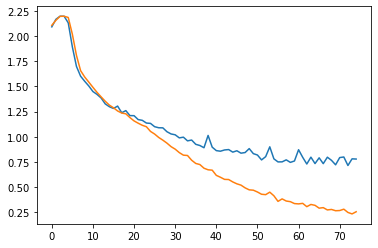

In [28]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)

3 LSTM layer seems to have even better accuracy, could continue optimizing parameters further